In [2]:

!pip install pandas textblob spacy matplotlib
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 108.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy

nlp = spacy.load("en_core_web_sm")

# Sample data
data = {
    "Review": [
        "I absolutely love this product!",
        "Terrible experience, very disappointed.",
        "The service was okay, not great.",
        "Amazing quality, I will buy again!",
        "Bad packaging, item damaged.",
        "Good value for the money.",
        "I hate how slow the delivery was.",
        "Perfect! Exactly what I needed.",
        "Not bad but could be better.",
        "Fantastic! Highly recommended."
    ]
}

df = pd.DataFrame(data)
df.head()

,Review
0,I absolutely love this product!
1,"Terrible experience, very disappointed."
2,"The service was okay, not great."
3,"Amazing quality, I will buy again!"
4,"Bad packaging, item damaged."


In [5]:

import string
import re

stop_words = set([
    'i','me','my','myself','we','our','ours','ourselves','you','your','yours',
    'yourself','yourselves','he','him','his','himself','she','her','hers','herself',
    'it','its','itself','they','them','their','theirs','themselves','what','which',
    'who','whom','this','that','these','those','am','is','are','was','were','be','been',
    'being','have','has','had','having','do','does','did','doing','a','an','the','and',
    'but','if','or','because','as','until','while','of','at','by','for','with','about',
    'against','between','into','through','during','before','after','above','below','to',
    'from','up','down','in','out','on','off','over','under','again','further','then',
    'once','here','there','when','where','why','how','all','any','both','each','few',
    'more','most','other','some','such','no','nor','not','only','own','same','so',
    'than','too','very','s','t','can','will','just','don','should','now'
])

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = re.split(r'\s+', text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['Cleaned'] = df['Review'].apply(clean_text)
df.head()

,Review,Cleaned
0,I absolutely love this product!,absolutely love product
1,"Terrible experience, very disappointed.",terrible experience disappointed
2,"The service was okay, not great.",service okay great
3,"Amazing quality, I will buy again!",amazing quality buy
4,"Bad packaging, item damaged.",bad packaging item damaged


In [6]:

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Cleaned'].apply(get_sentiment)
df.head()

,Review,Cleaned,Sentiment
0,I absolutely love this product!,absolutely love product,Positive
1,"Terrible experience, very disappointed.",terrible experience disappointed,Negative
2,"The service was okay, not great.",service okay great,Positive
3,"Amazing quality, I will buy again!",amazing quality buy,Positive
4,"Bad packaging, item damaged.",bad packaging item damaged,Negative


In [7]:

def extract_keyphrases(text):
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks]

df['Key_Phrases'] = df['Review'].apply(extract_keyphrases)
df.head()

,Review,Cleaned,Sentiment,Key_Phrases
0,I absolutely love this product!,absolutely love product,Positive,"[I, this product]"
1,"Terrible experience, very disappointed.",terrible experience disappointed,Negative,[Terrible experience]
2,"The service was okay, not great.",service okay great,Positive,[The service]
3,"Amazing quality, I will buy again!",amazing quality buy,Positive,[I]
4,"Bad packaging, item damaged.",bad packaging item damaged,Negative,[item]


CSV file saved successfully!


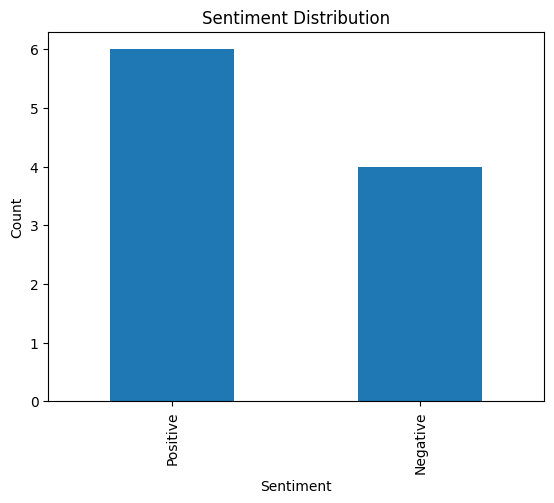

In [8]:

df.to_csv("sentiment_project.csv", index=False)
print("CSV file saved successfully!")

df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()